<center><h1>Assignment 2 - Decision Trees</h1></center>
<center><h2>Data 622: Big Data and Machine Learning</h2></center>
<center><h3>Dirk Hartog</h3></center>

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import libraries/packages to build model and tree visualization 
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import randint
from sklearn.preprocessing import StandardScaler

# import libraries for obtaining metrics
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# import libraries to get images of tree
from sklearn import tree

Using the Parkinsons Disease Data set from assignment 1, this project aims to evluate another classification method to predict the presence of parkinson's disease using decision trees and random forest techniques. 

The Parkinsons Disease Data set that can be found at <a href = "https://www.kaggle.com/datasets/rabieelkharoua/parkinsons-disease-dataset-analysis">Kaggle.com</a>. 

## Data Set Key

**Patient Information**

- Patient ID
    - PatientID: A unique identifier assigned to each patient (3058 to 5162).
- Demographic Details
    - Age: The age of the patients ranges from 50 to 90 years.
    - Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
    - Ethnicity: The ethnicity of the patients, coded as follows:
        - 0: Caucasian
        - 1: African American
        - 2: Asian
        - 3: Other
    - EducationLevel: The education level of the patients, coded as follows:
        - 0: None
        - 1: High School
        - 2: Bachelor's
        - 3: Higher
- Lifestyle Factors
    - BMI: Body Mass Index of the patients, ranging from 15 to 40.
    - Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.        
    - AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.
    - PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
    - DietQuality: Diet quality score, ranging from 0 to 10.
    - SleepQuality: Sleep quality score, ranging from 4 to 10.
    
**Medical History**

- FamilyHistoryParkinsons: Family history of Parkinson's Disease, where 0 indicates No and 1 indicates Yes.
- TraumaticBrainInjury: History of traumatic brain injury, where 0 indicates No and 1 indicates Yes.
- Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.
- Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
- Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.
- Stroke: History of stroke, where 0 indicates No and 1 indicates Yes.
    
**Clinical Measurements**

- SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.
- DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.
- CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.
- CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
- CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
- CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.
    
**Cognitive and Functional Assessments**

- UPDRS: Unified Parkinson's Disease Rating Scale score, ranging from 0 to 199. Higher scores indicate greater severity of the disease.
- MoCA: Montreal Cognitive Assessment score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
- FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
    
**Symptoms**

- Tremor: Presence of tremor, where 0 indicates No and 1 indicates Yes.
- Rigidity: Presence of muscle rigidity, where 0 indicates No and 1 indicates Yes.
- Bradykinesia: Presence of bradykinesia (slowness of movement), where 0 indicates No and 1 indicates Yes.
- PosturalInstability: Presence of postural instability, where 0 indicates No and 1 indicates Yes.
- SpeechProblems: Presence of speech problems, where 0 indicates No and 1 indicates Yes.
- SleepDisorders: Presence of sleep disorders, where 0 indicates No and 1 indicates Yes.
- Constipation: Presence of constipation, where 0 indicates No and 1 indicates Yes.
    
**Diagnosis Information**

- Diagnosis: Diagnosis status for Parkinson's Disease, where 0 indicates No and 1 indicates Yes.
    
**Confidential Information**

- DoctorInCharge: This column contains confidential information about the doctor in charge, with "DrXXXConfid" as the value for all patients.


In [129]:
# Read in the data

data = pd.read_csv("https://raw.githubusercontent.com/D-hartog/DATA622/refs/heads/main/assignment1/parkinsons_disease_data.csv")
parkinsons_df = data.copy()
parkinsons_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


## Exploratory Data Analysis

In [132]:
# Get information about features (Missing values and data types)

parkinsons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [134]:
# Drop the "DoctorInCharge" as this feature does not add any predictive value
parkinsons_df.drop(columns= "DoctorInCharge", inplace = True)

In [136]:
# There are many features that are categorical data types that need to be converted

cols_to_convert = ["Gender", "Ethnicity", "EducationLevel", "Smoking", "FamilyHistoryParkinsons",
                 "TraumaticBrainInjury", "Hypertension", "Diabetes", "Stroke", "Tremor", "Rigidity", 
                 "Bradykinesia", "PosturalInstability", "SpeechProblems", "SleepDisorders", "Constipation",
                 "Diagnosis", "Depression"]

for col in cols_to_convert: 
    parkinsons_df[col] = parkinsons_df[col].astype("object")

In [138]:
# Summary statistics on the numeric features 

parkinsons_df.describe(include = ["int", "float"]).T

,count,mean,std,min,25%,50%,75%,max
PatientID,2105.0,4110.000000,607.805479,3058.000000,3584.000000,4110.000000,4636.000000,5162.000000
Age,2105.0,69.601900,11.594511,50.000000,60.000000,70.000000,80.000000,89.000000
BMI,2105.0,27.209493,7.208099,15.008333,20.782176,27.184571,33.462452,39.999887
AlcoholConsumption,2105.0,10.040413,5.687014,0.002228,5.150278,10.070337,14.829565,19.988866
PhysicalActivity,2105.0,5.016674,2.890919,0.004157,2.455703,5.031550,7.512795,9.995255
DietQuality,2105.0,4.912901,2.872115,0.000011,2.478503,4.825187,7.381487,9.995864
SleepQuality,2105.0,6.996639,1.753065,4.000497,5.488864,6.929819,8.558719,9.999821
SystolicBP,2105.0,133.719715,26.502355,90.000000,110.000000,133.000000,157.000000,179.000000
DiastolicBP,2105.0,90.249881,17.061488,60.000000,75.000000,91.000000,105.000000,119.000000
CholesterolTotal,2105.0,226.860840,43.589406,150.062698,189.385178,228.528256,264.608100,299.963074


In [140]:
# Summary stats for all categorial features including the outcome variable

parkinsons_df.describe(include = "object").T

,count,unique,top,freq
Gender,2105,2,0,1068
Ethnicity,2105,4,0,1270
EducationLevel,2105,4,1,840
Smoking,2105,2,0,1481
FamilyHistoryParkinsons,2105,2,0,1798
TraumaticBrainInjury,2105,2,0,1881
Hypertension,2105,2,0,1798
Diabetes,2105,2,0,1793
Depression,2105,2,0,1673
Stroke,2105,2,0,2002


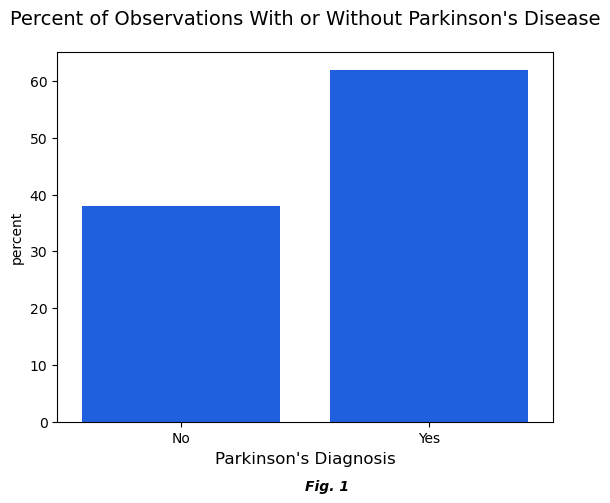

In [142]:
# Look at the count of observations with Parkinsons and without Parkinsons

sns.countplot(data = parkinsons_df, x = parkinsons_df["Diagnosis"], stat = "percent", color = '#0056ff')
plt.xticks([0,1], ["No","Yes"])
plt.xlabel("Parkinson's Diagnosis", fontsize = 12)

plt.title("Percent of Observations With or Without Parkinson's Disease", fontsize = 14, pad = 20)
plt.text(x = 0.5, y = -12, s = "Fig. 1", fontstyle = "italic", fontweight = "demibold")
plt.show()

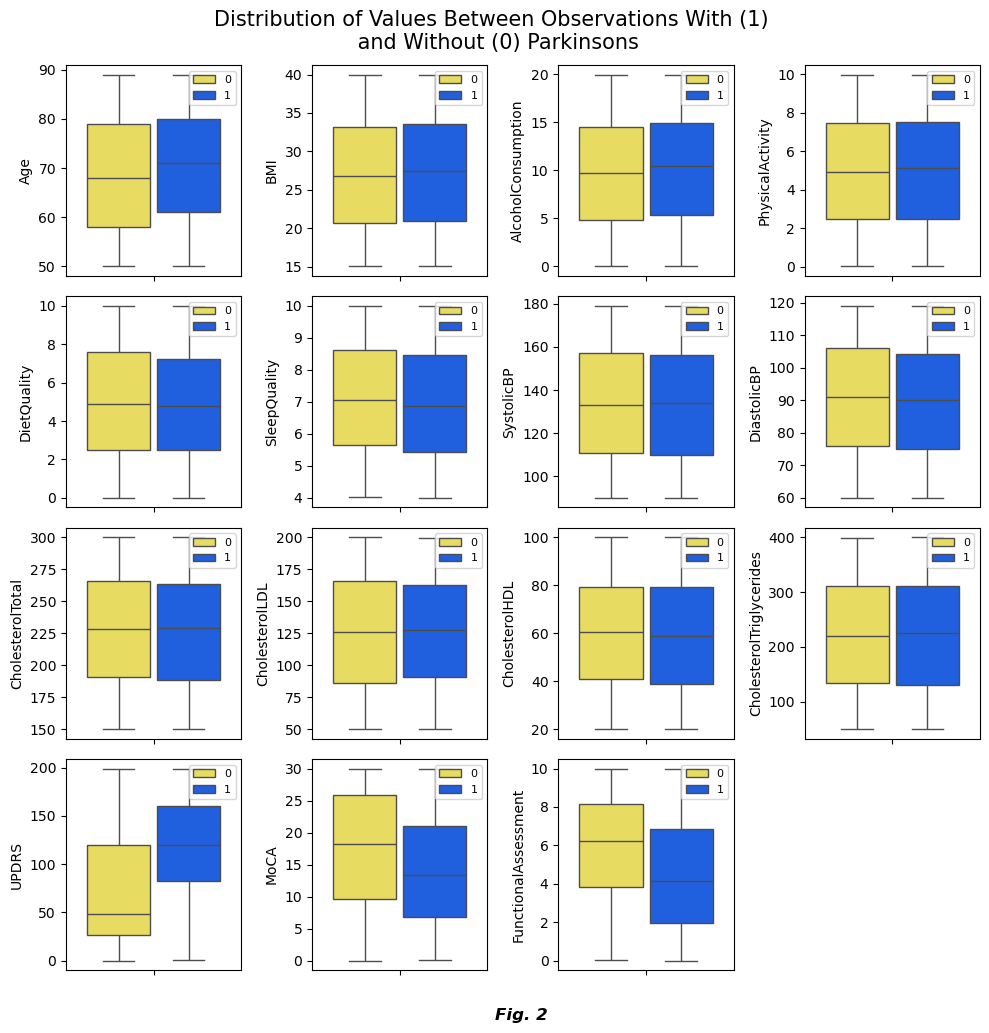

In [144]:
# Visualize the distributions of the numeric data between observations with and without parkinsons with box plots
parkinsons_numeric = parkinsons_df.select_dtypes(include = ["int", "float"])
num_columns = parkinsons_numeric.iloc[0:, 1:].columns

plt.figure(figsize = (10,10))

for i in range(len(num_columns)):
    plt.subplot(4,4,i+1)
    sns.boxplot(data = parkinsons_numeric.iloc[0:, 1:],
                  y = num_columns[i],
                  hue = parkinsons_df["Diagnosis"],
                  palette = ['#ffed4a', '#0056ff'], 
               dodge = True,
               gap = 0.1)

    plt.legend(fontsize = 8, loc = 'upper right')

plt.suptitle("Distribution of Values Between Observations With (1) \n and Without (0) Parkinsons", 
            fontsize = 15)
plt.tight_layout()
plt.figtext(x = 0.5, y = -0.03, s = "Fig. 2", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.show()

In [145]:
# Median value of UPDRS in each class of diagnosis

parkinsons_df.groupby("Diagnosis")["UPDRS"].median()

Diagnosis
0     48.584882
1    120.199982
Name: UPDRS, dtype: float64

In [146]:
# Create a seperate data frame with all catergorical variables to visualize counts between classes
# - include stratification by diagnosis

parkinsons_cat = parkinsons_df.select_dtypes(include = "object")

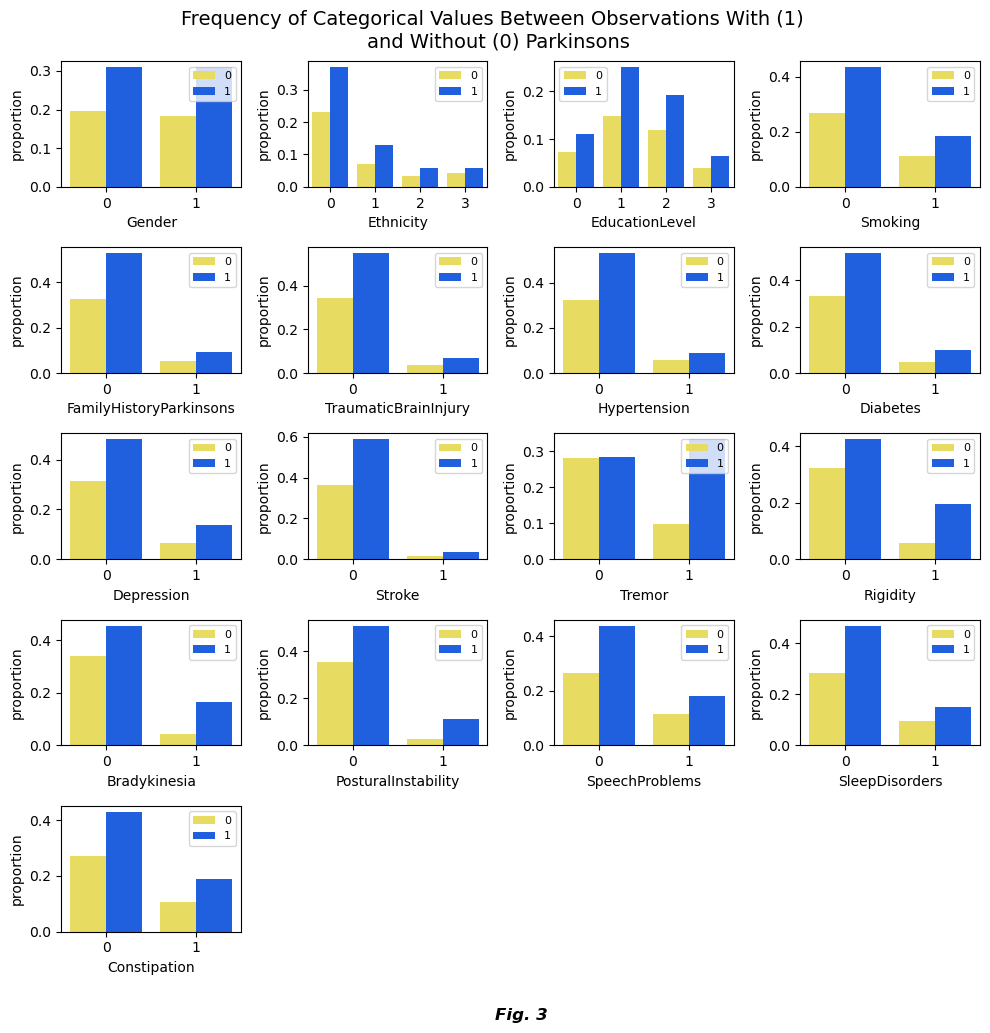

In [147]:
# Visualize the counts of cateforical data - 5 rows, 4 columns 

# Create variable with categorical columns 
cat_columns = parkinsons_cat.columns

# Create plot
plt.figure(figsize = (10,10))

for i in range(len(parkinsons_cat.columns) - 1):
    plt.subplot(5,4,i+1)
    sns.countplot(data = parkinsons_cat,
                  x = cat_columns[i],
                  hue = cat_columns[-1],
                  palette = ['#ffed4a', '#0056ff'], stat = "proportion")
    plt.legend(fontsize = 8)

plt.suptitle("Frequency of Categorical Values Between Observations With (1) \n and Without (0) Parkinsons", 
            fontsize = 14)
plt.figtext(x = 0.5, y = -0.03, s = "Fig. 3", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.tight_layout()

## Decision Tree Modelling

In [31]:
# Convert categorical features back to numeric 
parkinsons_df[cat_columns] = parkinsons_df[cat_columns].astype("int")


# Assign features to predictor vairables and repsonse variable

X = parkinsons_df.drop(["Diagnosis", "PatientID"], axis = 1)
y = parkinsons_df["Diagnosis"]

In [33]:
# Split the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 123, stratify=y)

In [35]:
y_test.value_counts()

1    392
0    240
Name: Diagnosis, dtype: int64

In [39]:
print("Just guessing that everyone had Parkinson's from our test data set, our model's accuracy would be", round(392/(392+240),2))

Just guessing that everyone had Parkinson's from our test data set, our model's accuracy would be 0.62


### Model 1 - Using the best split but controlling for size of the tree

In [42]:
X = parkinsons_df.drop(["Diagnosis", "PatientID"], axis = 1)
y = parkinsons_df["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 123, stratify=y)

# Build a decision tree classifier object
clf1 = DecisionTreeClassifier(max_depth = 3, splitter = "best")

# The dt classifier 
clf1 = clf1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf1.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8022151898734177


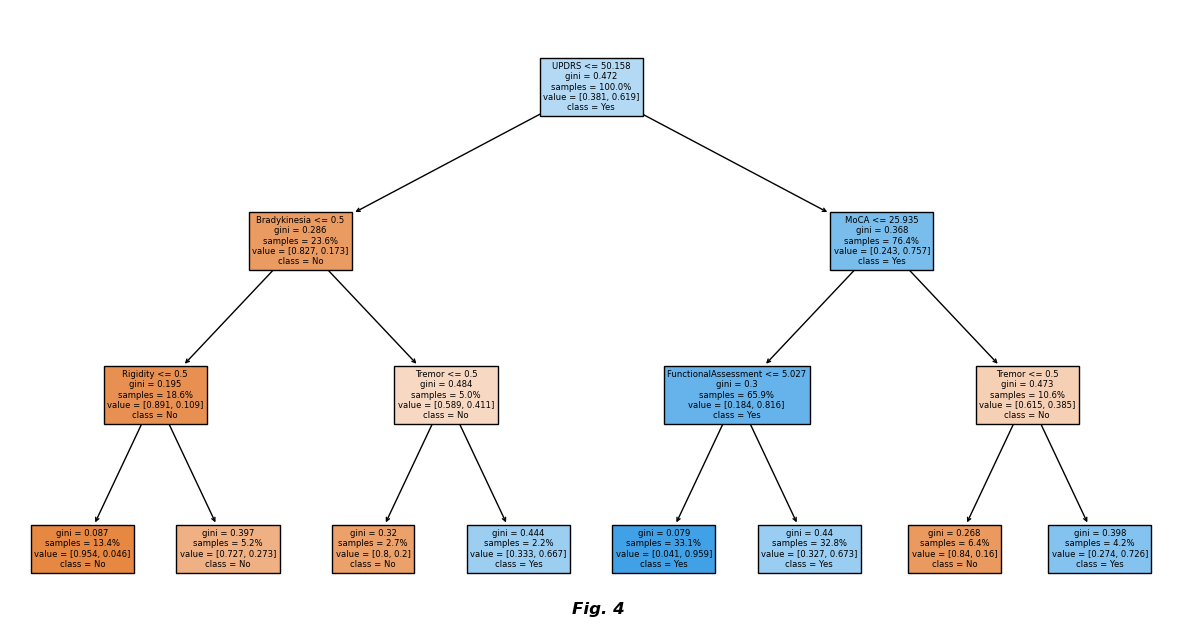

In [77]:
from sklearn import tree
plt.figure(figsize = (15, 8))
tree.plot_tree(clf1, proportion=True, 
               feature_names=list(X.columns), 
              class_names=["No", "Yes"], filled = True)
plt.figtext(x = 0.5, y = 0.125, s = "Fig. 4", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.show()

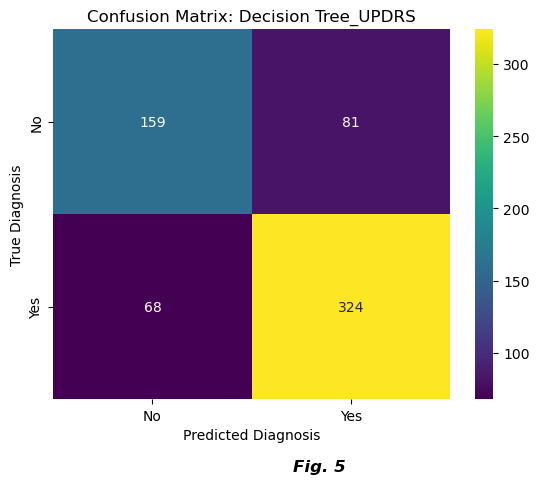

In [79]:
# Confusion Matrix 

con_mat = confusion_matrix(y_true = y_test, 
                           y_pred = y_pred, labels = clf1.classes_)
sns.heatmap(con_mat, annot=True,
           xticklabels = ["No", "Yes"],
           yticklabels = ["No", "Yes"], 
           fmt="d", 
           cmap="viridis")

# Set labels so they are not in exponential form 
plt.ylabel("True Diagnosis")
plt.xlabel("Predicted Diagnosis")
plt.figtext(x = 0.5, y = -0.04, s = "Fig. 5", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.title("Confusion Matrix: Decision Tree_UPDRS")
plt.show()

In [48]:
# F1 Score 

model1_f1 = f1_score(y_test, y_pred)

# Sensitivity
model1_sens = recall_score(y_test, y_pred)

# Precision
model1_prec = precision_score(y_test, y_pred)

# Specificity
model1_spec = con_mat[0,0]/(con_mat[0,0] + con_mat[0,1])

# Accuracy
model1_acc = accuracy_score(y_test, y_pred)

model1_metrics = [model1_f1, model1_sens, model1_spec, model1_prec, model1_acc]

In [54]:
# Feature Importance 
importances = pd.DataFrame({"features" : X_train.columns, "importance": clf1.feature_importances_})
importances[importances.sort_values("importance", ascending = False)["importance"] > 0]

/var/folders/85/mb8f618d7fg208txtk5n8ddc0000gn/T/ipykernel_84406/2383283113.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  importances[importances.sort_values("importance", ascending = False)["importance"] > 0]


,features,importance
22,UPDRS,0.567394
23,MoCA,0.157343
24,FunctionalAssessment,0.124557
25,Tremor,0.099907
26,Rigidity,0.017914
27,Bradykinesia,0.032885


In [56]:
# Use cross validation to improve accuracy
kf = KFold(n_splits = 5, shuffle = False)

accuracy_list = []
n = 0

print("---CROSS VALIDATION each fold ---")
for train_index, test_index in kf.split(X,y):
    clf = DecisionTreeClassifier(max_depth = 3, splitter = "best").fit(X.iloc[train_index], y.iloc[train_index])
    score = clf.score(X.iloc[test_index], y.iloc[test_index])
    
    accuracy_list.append(score)
    print(f'Model: {n+1}')
    print(f'Accuracy: {accuracy_list[n]}')
    
    n += 1

---CROSS VALIDATION each fold ---
Model: 1
Accuracy: 0.8194774346793349
Model: 2
Accuracy: 0.8194774346793349
Model: 3
Accuracy: 0.8527315914489311
Model: 4
Accuracy: 0.8099762470308789
Model: 5
Accuracy: 0.7458432304038005


In [62]:
print(f"Mean accuracy score using 5 - Fold CV, {round(np.mean(accuracy_list),2)}")

Mean accuracy score using 5 - Fold CV, 0.81


### Decsision Tree model 2 - Using the random split using the same max depth as model 1

In [65]:
# Build a seocond decision tree classifier object
clf2 = DecisionTreeClassifier(max_depth = 3, splitter = "random")

# The dt classifier 
clf2 = clf2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf2.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7642405063291139


In [67]:
# Run the above again if the root node is UPDRS to start with a differnt feature

column_index = clf2.tree_.feature[0]
X.columns[column_index]

'Tremor'

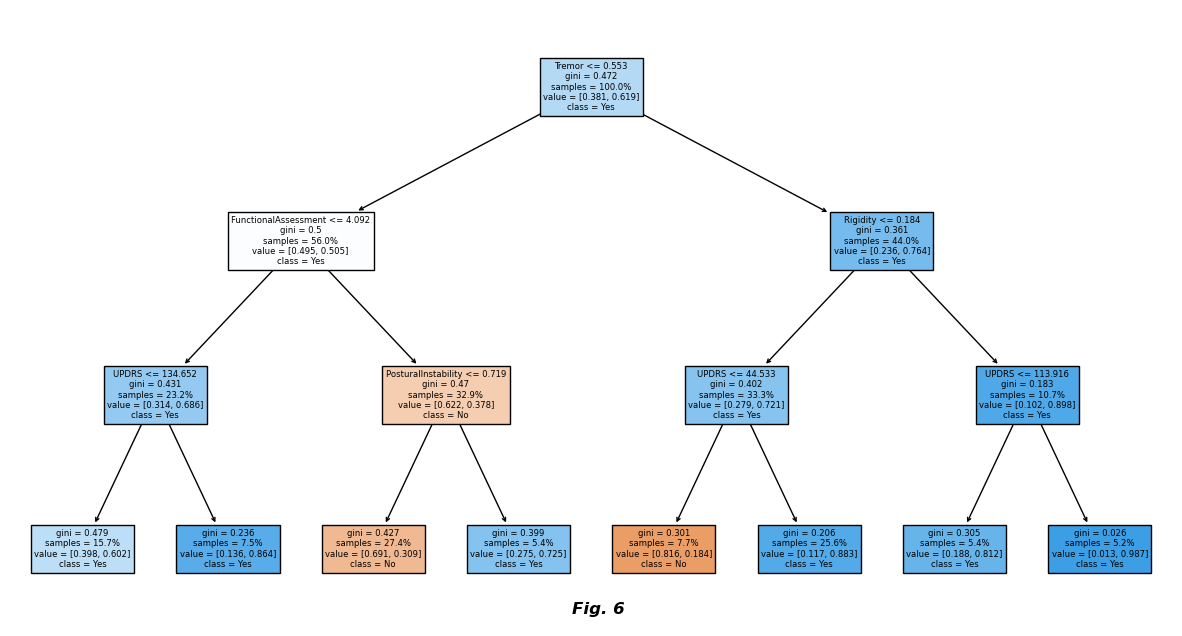

In [81]:
from sklearn import tree
plt.figure(figsize = (15, 8))
tree.plot_tree(clf2, proportion=True, 
               feature_names=list(X.columns), 
              class_names=["No", "Yes"], filled = True)
plt.figtext(x = 0.5, y = 0.125, s = "Fig. 6", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.show()

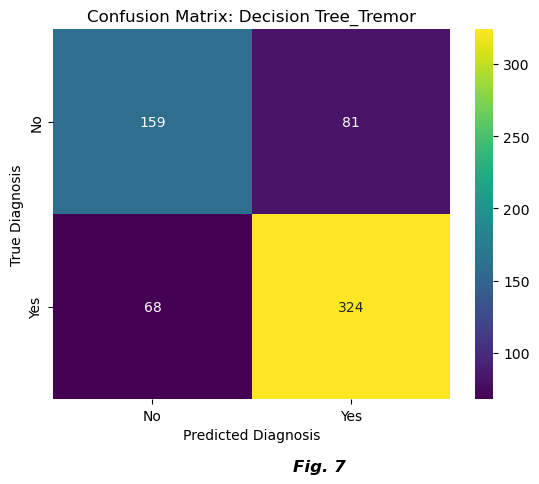

In [83]:
# Confusion Matrix 

con_mat = confusion_matrix(y_true = y_test, 
                           y_pred = y_pred, labels = clf2.classes_)
sns.heatmap(con_mat, annot=True,
           xticklabels = ["No", "Yes"],
           yticklabels = ["No", "Yes"], 
           fmt="d", 
           cmap="viridis")

# Set labels so they are not in exponential form 
plt.ylabel("True Diagnosis")
plt.xlabel("Predicted Diagnosis")
plt.figtext(x = 0.5, y = -0.04, s = "Fig. 7", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.title("Confusion Matrix: Decision Tree_Tremor")
plt.show()

In [85]:
# F1 Score 
model2_f1 = f1_score(y_test, y_pred)

# Sensitivity
model2_sens = recall_score(y_test, y_pred)

# Precision
model2_prec = precision_score(y_test, y_pred)

# Specificity
model2_spec = con_mat[0,0]/(con_mat[0,0] + con_mat[0,1])

# Accuracy
model2_acc = accuracy_score(y_test, y_pred)

model2_metrics = [model2_f1, model2_sens, model2_spec, model2_prec, model2_acc]

In [95]:
# Feature Importance 
importances = pd.DataFrame({"features" : X_train.columns, "importance": clf2.feature_importances_})
importances[importances.sort_values("importance", ascending = False)["importance"] >0]

/var/folders/85/mb8f618d7fg208txtk5n8ddc0000gn/T/ipykernel_84406/3446304438.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  importances[importances.sort_values("importance", ascending = False)["importance"] >0]


,features,importance
22,UPDRS,0.456250
24,FunctionalAssessment,0.176540
25,Tremor,0.225315
26,Rigidity,0.034687
28,PosturalInstability,0.107208


In [97]:
# Use cross validation to improve accuracy
kf = KFold(n_splits = 5, shuffle = False)

accuracy_list = []
n = 0

print("---CROSS VALIDATION each fold ---")
for train_index, test_index in kf.split(X,y):
    clf = DecisionTreeClassifier(max_depth = 3, splitter = "random", random_state=True).fit(X.iloc[train_index], y.iloc[train_index])
    score = clf.score(X.iloc[test_index], y.iloc[test_index])
    
    accuracy_list.append(score)
    print(f'Model: {n+1}')
    print(f'Accuracy: {accuracy_list[n]}')
    
    n += 1

---CROSS VALIDATION each fold ---
Model: 1
Accuracy: 0.7672209026128266
Model: 2
Accuracy: 0.7767220902612827
Model: 3
Accuracy: 0.7553444180522565
Model: 4
Accuracy: 0.7672209026128266
Model: 5
Accuracy: 0.684085510688836


In [121]:
print(f"Mean accuracy score using 5 - Fold CV, {round(np.mean(accuracy_list), 2)}")

Mean accuracy score using 5 - Fold CV, 0.75


### Model - Random Forest

In [102]:
# Building a Random Forest Model using hyperparameter tuing and cross-validation 

# Conduct hyperparameter tuning and compare models 

param_dist = {'n_estimators': randint(10,50),
              'max_depth': randint(1,5)}

# Create a random forest classifier
rf_model = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf_model, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb3a25f2ca0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb3b08ec100>})

In [104]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 3, 'n_estimators': 21}


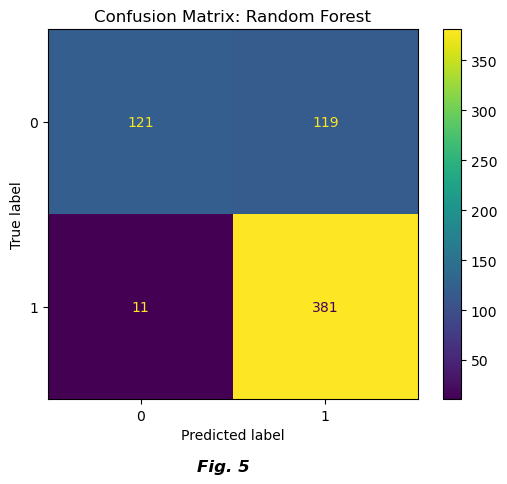

In [106]:
# See how using the best model compares by generating predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#print(classification_report(y_noshow_test, y_pred_noshow_best))

ConfusionMatrixDisplay(confusion_matrix=cm,
                  display_labels=best_rf.classes_).plot()
plt.figtext(x = 0.4, y = -0.04, s = "Fig. 5", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.title("Confusion Matrix: Random Forest")
plt.show()

In [108]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7943037974683544


In [110]:
# F1 Score 
rf_f1 = f1_score(y_test, y_pred)

# Sensitivity
rf_sens = recall_score(y_test, y_pred)

# Precision
rf_prec = precision_score(y_test, y_pred)

# Specificity
rf_spec = con_mat[0,0]/(con_mat[0,0] + con_mat[0,1])

# Accuracy 
rf_acc = accuracy_score(y_test, y_pred)

rf_metrics = [rf_f1, rf_sens, rf_spec, rf_prec, rf_acc]

In [114]:
metrics = pd.DataFrame({"Decision Tree_UPDRS":model1_metrics, 
              "Decision Tree_Tremor":model2_metrics, 
              "Random Forest" : rf_metrics})
metrics.index = ["F1_score", "Sensitivity", "Specificity", "Precision", "Accuracy"]

### Metric table

In [117]:
metrics

,Decision Tree_UPDRS,Decision Tree_Tremor,Random Forest
F1_score,0.852071,0.813049,0.854260
Sensitivity,0.918367,0.826531,0.971939
Specificity,0.612500,0.662500,0.662500
Precision,0.794702,0.800000,0.762000
Accuracy,0.802215,0.764241,0.794304
